In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Bayes Theorem

In probability theory and statistics, Bayes' theorem (alternatively Bayes' law or Bayes' rule), named after Reverend Thomas Bayes, describes the probability of an event, based on prior knowledge of conditions that might be related to the event. [1](https://plato.stanford.edu/archives/spr2019/entries/bayes-theorem/)

#### $$P(A|B) = \frac {P(B|A)P(A)}{P(B)}$$

I'm a visual learner. My favourite intuitive example of Bayes Theorem is this [using lego bricks](https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego):

<img src="lego-probability-space.jpeg" width="400" height="400">

The image shows a 60 (6 * 10) lego unit area
 - 40 blue areas
 - 20 red areas
 - 6 intersecting yellow areas. 

We can work through the maths to determine the probabilities and conditional probabilities of each colour.

In [9]:
pBlue = 40/60
pRed = 20/60
pYellow = 6/60
pYellowRed = 4/20 # probabiity of Yellow given Red
pYellowBlue = 2 / 40 # probabiity of Yellow given Blue

print('Cond p(Yellow|Red) = {:.3f}'.format(pYellowRed))
print('Cond p(Yellow|Blue) = {:.3f}'.format(pYellowBlue))

Cond p(Yellow|Red) = 0.200
Cond p(Yellow|Blue) = 0.050


We now some baseline information for the probability and conditional probility of landing on each colour within the Legosphere. We can apply Bayes theorem to generate estimates for "if we land on a yellow brick, what is the probability its red underneath?"

$$P(A|B) = \frac {P(B|A)P(A)}{P(B)}$$

$$P(Red|Yellow) = \frac {P(Yellow|Red)P(Red)}{P(Yellow)}$$

In [14]:
pRedYellow = pYellowRed*pRed/pYellow
print('Cond p(Red|Yellow) = {:.3f}'.format(pRedYellow))

Cond p(Red|Yellow) = 0.667


## Bayesian Inference

Bayesian inference follows:

 - Evaluate prior assumptions and observational data. 
 - Develop a probabilistic model of the data.
 - Specify prior parameter values for the distributions of the probabilistic model.
 - Apply Bayes’ theorem to derive the posterior parameter values. 

### Example: Coin Toss

Here we are testing wether our coin is bias. We have:
- prior belief of getting tails 0.5 $P(Prior)$
- 200 coin toss observations with 59 tails.

#### The Prior Distribution
We have a reasonable assumption that the $P(Prior)$ is 0.5. But in the bayesian world we treat our assumptions as point estimates within possible range of values. We can use the traingle distribution to generate some estimates about our prior estimate. 

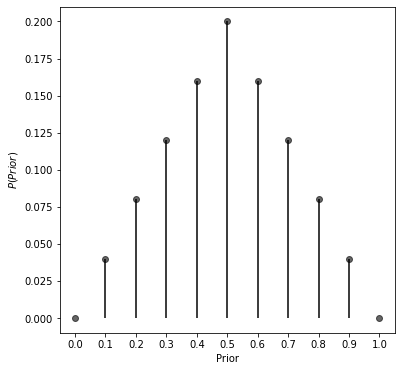

In [54]:
# prior estimates
from scipy.stats import triang

mp = 0.5
x_ = np.arange(0,1.1,.1)
p_ = triang.pdf(x, mp)
p_ = p_/sum(p_)

fig,axs = plt.subplots(1,1,figsize=(6,6))
axs.vlines(x,0,p_,'k')
axs.plot(x,p_,'ko', lw=5, alpha=0.6, label='triang pdf')
axs.set_xticks(x)
axs.set_xlabel('Prior')
axs.set_ylabel('$P(Prior)$');